In [7]:
import dhlab as dh
import tools_imag as ti
import dhlab.api.dhlab_api as api

import pandas as pd

In [4]:
c = ti.make_imagination_corpus()

In [17]:
api.get_document_frequencies??

Signature:
api.get_document_frequencies(
    urns: List[str] = None,
    cutoff: int = 0,
    words: List[str] = None,
) -> pandas.core.frame.DataFrame
Source:   
def get_document_frequencies(urns: List[str] = None, cutoff: int = 0, words: List[str] = None) -> DataFrame:
    """Fetch frequency counts of ``words`` in documents (``urns``).

    Call the API :py:obj:`~dhlab.constants.BASE_URL` endpoint
    `/frequencies`.

    :param list urns: list of uniform resource name strings, for example:
        ``["URN:NBN:no-nb_digibok_2008051404065", "URN:NBN:no-nb_digibok_2010092120011"]``
    :param int cutoff: minimum frequency of a word to be counted
    :param list words: a list of words to be counted - if left None, whole document is returned. If not None both the counts and their relative frequency is returned.
    """
    params = locals()
    r = requests.post(f"{BASE_URL}/frequencies", json=params)
    result = r.json()
    # check if words are passed - return differs a bit
    if wor

In [18]:
cnts = api.get_document_frequencies(list(c.urn), words = ["og", "i", '.', ','])

In [21]:
cnts

freq                                                              \
urn  100000474 100000547 100000642 100000647 100000648 100000649 100000652   
word                                                                         
,       8347.0    8909.0    6946.0    5854.0    7702.0    6600.0    2862.0   
.       5808.0    5654.0    5317.0    3419.0    5493.0    4583.0    1777.0   
i       2565.0    2657.0    1682.0    1506.0    2503.0    2884.0     673.0   
og      3999.0    3318.0    2242.0    2288.0    4640.0    3348.0    1445.0   

                                    ...   relfreq                      \
urn  100000658 100000660 100000663  ... 100664406 100664412 100664414   
word                                ...                                 
,       1754.0    1684.0    2589.0  ...  0.084105  0.081303  0.060131   
.        784.0    1004.0    2379.0  ...  0.035377  0.037558  0.042470   
i        445.0     477.0     834.0  ...  0.022428  0.022035  0.023859   
og       492.0     611.0    1787.0  ...  0.037558  0.033976  0.039139   

                                                                            
urn  100664415 100664418 100664420 100664421 100664422 100664425 100664430  
word                                                                        
,     0.063501  0.043493  0.099141  0.077967  0.079851  0.068601  0.066187  
.     0.036706  0.043493  0.078473  0.051505  0.036474  0.053575  0.057806  
i     0.019895  0.025254  0.020380  0.022533  0.016974  0.017270  0.022236  
og    0.039573  0.040439  0.029780  0.023452  0.035764  0.027890  0.027539  

[4 rows x 45104 columns]

In [26]:
def imagination_ngram(corpus, words, mode='rel'):
    cnts = api.get_document_frequencies(list(corpus.urn), words = words)
    d2y = pd.Series(corpus.set_index('dhlabid')['year'].to_dict())
    d2y.to_frame('year')
    if mode.startswith('r') or mode.startswith('R'):
        df = cnts['relfreq']
    else:
        df = cnts['freq']
    frek = df.transpose().copy()
    frek = pd.concat([frek, d2y.to_frame('year')], axis = 1)
    return frek.groupby('year').sum()

<Axes: xlabel='year'>

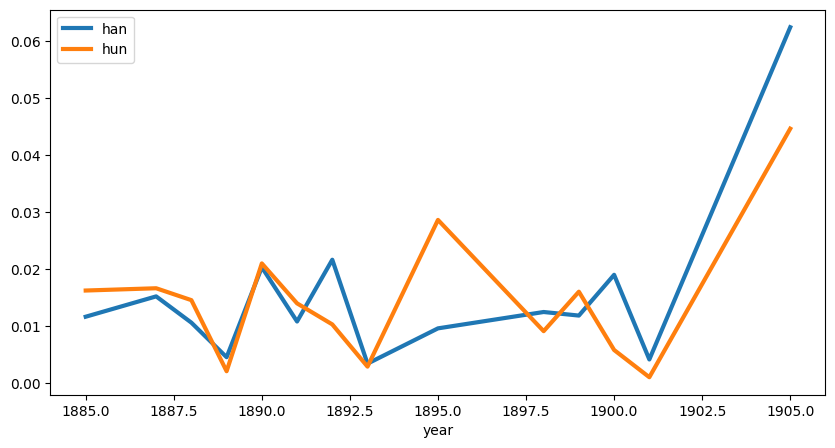

In [30]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["han", "hun"]).plot(figsize=(10,5), lw=3)

<Axes: xlabel='year'>

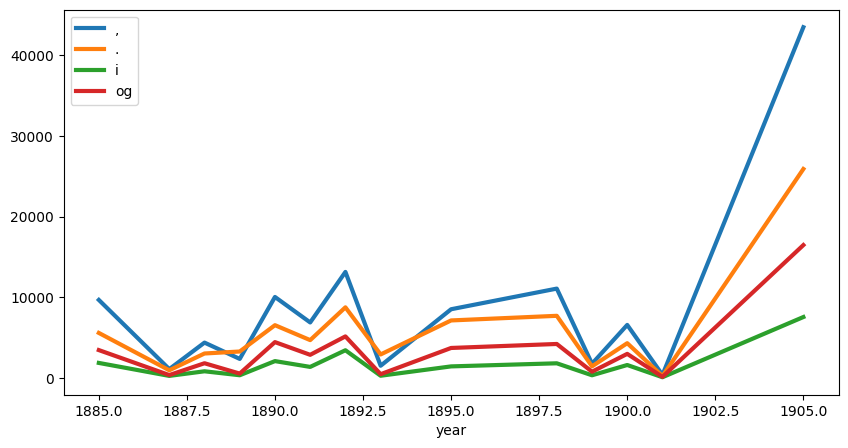

In [28]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["og", "i", '.', ','], mode='abs').plot(figsize=(10,5), lw=3)